clustering con classificatore da pipe train test --> error

In [1]:
import sys
sys.path.append('../../')

In [2]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

from modules import machine_learning_utils as mlu

pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

# 1.0 Data retrieval

In [3]:
df = pd.read_pickle("../../data_lake/output/train.pkl")

# 2.0 Features Engineering

In [4]:
df = mlu.features_eng(df,'clustering')

In [5]:
cols = ['card1', 'card2', 'card3', 'card5', 'M4', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25',
       'id_26', 'id_27', 'id_28', 'id_29', 'id_30', 'id_32', 'id_33', 'id_34',
       'id_35', 'id_36', 'id_37', 'id_38','num_transaction_per_time','addr1','P_emaildomain','R_emaildomain']

In [6]:
df = df.drop(columns=cols)

In [7]:
df = df[df['isFraud']==0]
df = df.drop(columns='isFraud')

In [8]:
df = df.drop(columns=['addr2','multi_transaction_per_time'])

In [9]:
df.sample(1)

,TransactionAmt,ProductCD,card4,card6,DeviceType,max_c,max_d,customer_id,browser_enc,device_info_v4
127008,41.929,C,visa,debit,mobile,12.0,37.0,16,safari,other


In [10]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns

In [11]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler

imp_mean = IterativeImputer(random_state=0)
imp_mean2 = SimpleImputer(strategy='constant', fill_value='missing',verbose=0,add_indicator=True)
enc = OrdinalEncoder()
scaler = MinMaxScaler()

In [12]:
for i in df:
    if i in numerical_cols:
        if i != 'customer_id':
            df[i] = imp_mean.fit_transform(X = df[i].values.reshape(-1,1))
            # df[i] = np.log(df[i] +1)
            df[i] = scaler.fit_transform(X = df[i].values.reshape(-1,1))

In [13]:
for i in df:
    if i in categorical_cols:
        df[i] = df[i].astype(str)
        df[i] = imp_mean2.fit_transform(X = df[i].values.reshape(-1,1))
        # df[i] = enc.fit_transform(X = df[i].values.reshape(-1,1))

In [14]:
df.sample(3)

,TransactionAmt,ProductCD,card4,card6,DeviceType,max_c,max_d,customer_id,browser_enc,device_info_v4
88999,0.021862,C,mastercard,debit,mobile,0.000356,0.045087,23,chrome,other
134463,0.011551,C,visa,debit,mobile,0.001067,0.048015,72,safari,other
13640,0.036942,C,visa,debit,desktop,0.000534,0.027521,3163,chrome,windows


In [15]:
df['product_enc'] = 999
df['product_enc'] = df['product_enc'].mask(df['ProductCD']=='C',0)
df['product_enc'] = df['product_enc'].mask(df['ProductCD']=='H',1)
df['product_enc'] = df['product_enc'].mask(df['ProductCD']=='S',2)
df['product_enc'] = df['product_enc'].mask(df['ProductCD']=='R',3)
df = df.drop(columns='ProductCD')

In [16]:
df['card4_enc'] = 999
df['card4_enc'] = df['card4_enc'].mask(df['card4']=='visa',0)
df['card4_enc'] = df['card4_enc'].mask(df['card4']=='mastercard',1)
df['card4_enc'] = df['card4_enc'].mask(df['card4']=='american express',2)
df['card4_enc'] = df['card4_enc'].mask(df['card4']=='discover',3)
df = df.drop(columns='card4')

In [17]:
df['card6_enc'] = 999
df['card6_enc'] = df['card6_enc'].mask(df['card6']=='debit',0)
df['card6_enc'] = df['card6_enc'].mask(df['card6']=='credit',1)
df = df.drop(columns='card6')

In [18]:
df['DeviceType_enc'] = 999
df['DeviceType_enc'] = df['DeviceType_enc'].mask(df['DeviceType']=='mobile',0)
df['DeviceType_enc'] = df['DeviceType_enc'].mask(df['DeviceType']=='desktop',1)
df['DeviceType_enc'] = df['DeviceType_enc'].mask(df['DeviceType']=='tablet',2)
df = df.drop(columns='DeviceType')

In [19]:
df['browser_enc2'] = 7
df['browser_enc2'] = df['browser_enc2'].mask(df['browser_enc']=='chrome',0)
df['browser_enc2'] = df['browser_enc2'].mask(df['browser_enc']=='safari',1)
df['browser_enc2'] = df['browser_enc2'].mask(df['browser_enc']=='firefox',2)
df['browser_enc2'] = df['browser_enc2'].mask(df['browser_enc']=='ie',3)
df['browser_enc2'] = df['browser_enc2'].mask(df['browser_enc']=='android',4)
df['browser_enc2'] = df['browser_enc2'].mask(df['browser_enc']=='edge',5)
df['browser_enc2'] = df['browser_enc2'].mask(df['browser_enc']=='opera',6)
df = df.drop(columns='browser_enc')

In [20]:
df['device_info_v4_enc'] = 17
df['device_info_v4_enc'] = df['device_info_v4_enc'].mask(df['device_info_v4']=='ios',0)
df['device_info_v4_enc'] = df['device_info_v4_enc'].mask(df['device_info_v4']=='windows',1)
df['device_info_v4_enc'] = df['device_info_v4_enc'].mask(df['device_info_v4']=='samsung',2)
df['device_info_v4_enc'] = df['device_info_v4_enc'].mask(df['device_info_v4']=='hisense',3)
df['device_info_v4_enc'] = df['device_info_v4_enc'].mask(df['device_info_v4']=='moto',4)
df['device_info_v4_enc'] = df['device_info_v4_enc'].mask(df['device_info_v4']=='pixel',5)
df['device_info_v4_enc'] = df['device_info_v4_enc'].mask(df['device_info_v4']=='lg',6)
df['device_info_v4_enc'] = df['device_info_v4_enc'].mask(df['device_info_v4']=='blade',7)
df['device_info_v4_enc'] = df['device_info_v4_enc'].mask(df['device_info_v4']=='huawei',8)
df['device_info_v4_enc'] = df['device_info_v4_enc'].mask(df['device_info_v4']=='oneplus',9)
df['device_info_v4_enc'] = df['device_info_v4_enc'].mask(df['device_info_v4']=='alcatel',10)
df['device_info_v4_enc'] = df['device_info_v4_enc'].mask(df['device_info_v4']=='redmi',11)
df['device_info_v4_enc'] = df['device_info_v4_enc'].mask(df['device_info_v4']=='lenovo',12)
df['device_info_v4_enc'] = df['device_info_v4_enc'].mask(df['device_info_v4']=='asus',13)
df['device_info_v4_enc'] = df['device_info_v4_enc'].mask(df['device_info_v4']=='linux',14)
df['device_info_v4_enc'] = df['device_info_v4_enc'].mask(df['device_info_v4']=='android',15)
df['device_info_v4_enc'] = df['device_info_v4_enc'].mask(df['device_info_v4']=='zte',16)
df = df.drop(columns='device_info_v4')

In [21]:
df = df.set_index('customer_id')

In [22]:
df.sample(3)

,TransactionAmt,max_c,max_d,product_enc,card4_enc,card6_enc,DeviceType_enc,browser_enc2,device_info_v4_enc
customer_id,,,,,,,,,
10886,0.066195,0.001245,0.361871,2,0,1,1,0,1
6206,0.045225,0.000000,0.000000,0,1,1,1,0,1
26637,0.032845,0.000000,0.265596,1,2,1,1,0,1


Splitting

In [23]:
train, val, test = mlu.partitioning(df,0.7,0.15,'no')

# 3.0 Clustering --> Personas generation

In [24]:
from kmodes.kprototypes import KPrototypes
from sklearn.metrics import silhouette_score

import gower
import heapq

In [25]:
# sil=[]
# for num_clusters in list(range(2,30)):
#     kproto = KPrototypes(n_clusters=num_clusters, verbose=0,random_state = 301,n_init=5)
#     cluster_labels = kproto.fit_predict(df.values, categorical=[3,4,5,6,7,8])
#     df['cluster_labels'] = cluster_labels
#     dist = gower.gower_matrix(df.drop(columns=['cluster_labels']),cat_features = [False, False ,False, True, True,True,True,True,True])
#     sil.append(silhouette_score(dist,labels=cluster_labels, metric='precomputed'))
#     print('For cluster number: ',num_clusters,' the score is: ', sil[-1])

In [26]:
# df = df.drop(columns='cluster_labels')

In [27]:
kproto = KPrototypes(n_clusters=4, verbose=0,random_state = 301)
cluster_labels = kproto.fit_predict(train.values, categorical=[3,4,5,6,7,8])

In [28]:
centroid = []
for j,i in enumerate(kproto.cluster_centroids_):
    centroid.append(pd.DataFrame(i,index=['TransactionAmt','max_c', 'max_d','product_enc', 'card4_enc', 'card6_enc',
       'DeviceType_enc', 'browser_enc2', 'device_info_v4_enc'],columns=[j]))
centroid = pd.concat(centroid,axis=1)

In [29]:
centroid.style.background_gradient(cmap='brg',axis=1)

,0,1,2,3
TransactionAmt,0.060835,0.081628,0.027292,0.066726
max_c,0.007578,0.006973,0.011419,0.000889
max_d,0.047558,0.322228,0.059866,0.015805
product_enc,0.000000,3.000000,0.000000,1.000000
card4_enc,0.000000,0.000000,0.000000,0.000000
card6_enc,1.000000,0.000000,0.000000,1.000000
DeviceType_enc,1.000000,1.000000,0.000000,0.000000
browser_enc2,0.000000,0.000000,0.000000,1.000000
device_info_v4_enc,1.000000,1.000000,17.000000,0.000000


In [30]:
train['cluster_labels'] = cluster_labels

In [31]:
train.head(1)

,TransactionAmt,max_c,max_d,product_enc,card4_enc,card6_enc,DeviceType_enc,browser_enc2,device_info_v4_enc,cluster_labels
customer_id,,,,,,,,,,
38307,0.066195,0.0,0.0,1,0,1,1,5,1,0


In [32]:
train['cluster_labels'].value_counts()

0    2087
2    1472
3    1358
1     701
Name: cluster_labels, dtype: int64

# 2.0 Machine Learning on Personas
## 2.1 model cluster 0 

In [36]:
df_class = train.copy()
df_class['y'] = 0
df_class['y'] = df_class['y'].mask(df_class['cluster_labels']==0,1)

In [37]:
df_class['y'].value_counts()

0    3531
1    2087
Name: y, dtype: int64

In [38]:
train, val, test = mlu.partitioning(df_class,0.7,0.15,'y')

In [39]:
final_train = mlu.class_imbalance(train,'y')

1    1430
0    1430
Name: y, dtype: int64
Train dataset shape:  (2860, 11)


In [40]:
for i in final_train:
    if final_train[i].dtypes == 'object':
        final_train[i] = final_train[i].astype(str)

In [41]:
X_train = final_train.drop(columns='y')
y_train = final_train['y'].astype(float)

In [42]:
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object', 'bool']).columns

In [43]:
parameters = {'model__max_depth':[2,3],'model__n_estimators':[50,100],'model__learning_rate':[0.05,0.1],'model__min_samples_leaf':[2,3]}

In [44]:
model = mlu.model_training(X_train,y_train,numerical_cols,categorical_cols,parameters,'no')

GridSearchCV results...
Mean Train Scores: 
[0.96526838 0.9648024  0.96526838 0.96503539 0.97925505 0.97855477
 0.97995403 0.97832156 0.96550072 0.96969609 0.96550072 0.9694631
 0.98041892 0.99510435 0.97971951 0.99557077]

Mean CV Scores: 
[0.96222791 0.95803014 0.96222791 0.95803014 0.97132568 0.96992708
 0.97342652 0.96992708 0.9615335  0.96503098 0.9615335  0.96503098
 0.97062931 0.98461535 0.97062931 0.98391703]

Best Parameters: 
{'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__min_samples_leaf': 2, 'model__n_estimators': 100}



## 2.2 Evaluation model

In [45]:
for i in val:
    if val[i].dtypes == 'object':
        val[i] = val[i].astype(str)

In [46]:
X_val = val.drop(columns='y')
y_val = val['y'].astype(float)

In [47]:
m = mlu.model_calibration(model,X_val,y_val)

Test results...
Model Test Recall: 0.9842271293375394
--------------------------------------------------
Model Test Confusion Matrix
Classification report : 
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       526
         1.0       0.98      0.98      0.98       317

    accuracy                           0.99       843
   macro avg       0.98      0.99      0.98       843
weighted avg       0.99      0.99      0.99       843

DeviceType_enc: 0.44966131093421724
max_d: 0.20486400990330011
device_info_v4_enc: 0.19798808845829477
card6_enc: 0.06798927788036037
browser_enc2: 0.045713652343435655
product_enc: 0.02912112643091306
TransactionAmt: 0.004076430949002158
max_c: 0.0004627445024859584
card4_enc: 0.0001233585979907305


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_preprocessor',
                                                  Pipeline(steps=[('imputer',
                                                                   IterativeImputer(add_indicator=True,
                                                                                    estimator=ExtraTreesRegressor(n_estimators=5,
                                                                                                                  random_state=1),
                                                                                    random_state=1)),
                                                                  ('scaler',
                                                                   FunctionTransformer(func=<function log_transform at 0x7f6d9ebd94c0>))]),
                                                  Index(['TransactionAmt', 'max_c', 'max_d',...
      dtype='object')),
         

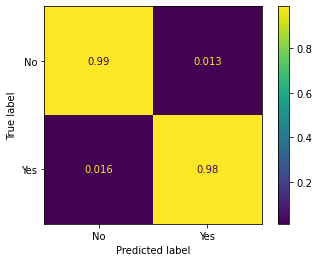

In [48]:
mlu.model_evaluation(m.base_estimator, X_val, y_val)

# 2.3 Predict probability

In [33]:
train.insert(0,'probability_score_cluster_0','')
train['probability_score_cluster_0'] = model.predict_proba(X_val)[:,1]

NameError: name 'model' is not defined

# 4.0 Error analysis

In [34]:
train.sample(2)

,probability_score_cluster_0,TransactionAmt,max_c,max_d,product_enc,card4_enc,card6_enc,DeviceType_enc,browser_enc2,device_info_v4_enc,cluster_labels
customer_id,,,,,,,,,,,
741,,0.018032,0.0,0.0,0,1,1,0,1,17,3
210,,0.032845,0.0,0.0,1,0,1,1,0,1,0


In [35]:
train['kp_pred'] = kproto.predict(X=train[['TransactionAmt', 'max_c', 'max_d',
       'product_enc', 'card4_enc', 'card6_enc', 'DeviceType_enc',
       'browser_enc2', 'device_info_v4_enc']],categorical=[3,4,5,6,7,8])

In [36]:
train.sample(3)

,probability_score_cluster_0,TransactionAmt,max_c,max_d,product_enc,card4_enc,card6_enc,DeviceType_enc,browser_enc2,device_info_v4_enc,cluster_labels,kp_pred
customer_id,,,,,,,,,,,,
15970,,0.032845,0.000000,0.032547,1,1,1,1,0,0,0,0
21021,,0.066195,0.000000,0.187206,3,1,1,1,0,1,1,1
4451,,0.006164,0.034679,0.387635,2,1,0,0,0,17,1,1


In [37]:
train[train['cluster_labels'] != train['kp_pred']]

,probability_score_cluster_0,TransactionAmt,max_c,max_d,product_enc,card4_enc,card6_enc,DeviceType_enc,browser_enc2,device_info_v4_enc,cluster_labels,kp_pred
customer_id,,,,,,,,,,,,


In [38]:
val['kp_pred'] = kproto.predict(X=val[['TransactionAmt', 'max_c', 'max_d',
       'product_enc', 'card4_enc', 'card6_enc', 'DeviceType_enc',
       'browser_enc2', 'device_info_v4_enc']],categorical=[3,4,5,6,7,8])

In [39]:
val.sample(5)

,TransactionAmt,max_c,max_d,product_enc,card4_enc,card6_enc,DeviceType_enc,browser_enc2,device_info_v4_enc,kp_pred
customer_id,,,,,,,,,,
18515,0.049520,0.000000,0.000000,1,0,0,1,0,1,0
10602,0.032845,0.000356,0.430380,3,1,0,0,1,0,1
3937,0.032845,0.000000,0.018542,1,0,0,0,0,6,2
21365,0.032845,0.000000,0.000512,1,1,1,0,1,0,3
27679,0.039230,0.000178,0.001757,0,0,0,0,1,17,2


In [40]:
test['kp_pred'] = kproto.predict(X=test[['TransactionAmt', 'max_c', 'max_d',
       'product_enc', 'card4_enc', 'card6_enc', 'DeviceType_enc',
       'browser_enc2', 'device_info_v4_enc']],categorical=[3,4,5,6,7,8])

In [41]:
test.sample(3)

,TransactionAmt,max_c,max_d,product_enc,card4_enc,card6_enc,DeviceType_enc,browser_enc2,device_info_v4_enc,kp_pred
customer_id,,,,,,,,,,
600,0.072865,0.008892,0.145802,2,1,1,1,5,1,0
32214,0.132895,0.000000,0.426867,3,2,1,1,1,0,1
34397,0.032845,0.000178,0.006685,1,0,0,1,1,0,3


In [42]:
test[test['cluster_labels'] != test['kp_pred']]

KeyError: 'cluster_labels'

<AxesSubplot:>

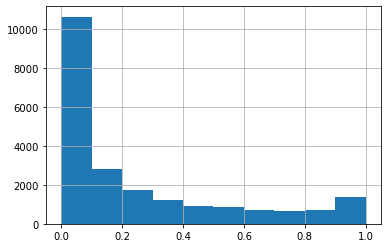

In [21]:
val['probability_score'].hist()

<AxesSubplot:>

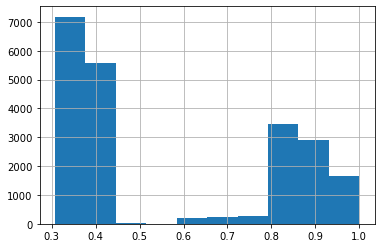

In [22]:
val['warning_score'].hist()

# 5.0 Bayesian Fusion

In [23]:
val['final_score'] = val.apply(lambda x: mlu.beta_fusion(x['probability_score'],x['warning_score'],0.6),axis=1)

In [24]:
val.sample(2)

,probability_score,isFraud,TransactionAmt,ProductCD,card4,card6,addr1,addr2,P_emaildomain,R_emaildomain,DeviceType,max_c,max_d,multi_transaction_per_time,browser_enc,device_info_v4,warning_score,final_score
24355,0.012667,0,25.000,H,visa,debit,203.0,87.0,gmail.com,nan,mobile,1.0,0.0,0,safari,ios,0.307262,0.167455
105103,0.229520,0,58.124,C,visa,debit,nan,nan,gmail.com,gmail.com,desktop,1.0,0.0,0,firefox,windows,0.307262,0.284555


<AxesSubplot:>

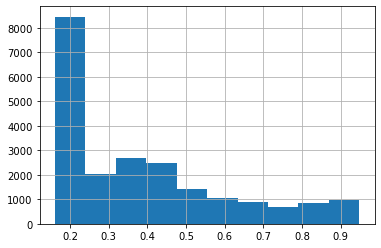

In [25]:
val['final_score'].hist()

# 6.0 Model Output

In [26]:
with open('../../data_lake/output/trained_model_v1.pkl','wb') as file:
    pickle.dump(m.base_estimator, file)

In [27]:
with open('../../data_lake/output/log_scaler_bi.pkl','wb') as file:
    pickle.dump(scaler, file)